## Liquidity Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("../csv_outputs/master_liquidity.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   token_address                  2123 non-null   object 
 1   chain                          2123 non-null   object 
 2   token_name                     2123 non-null   object 
 3   price_usd                      2065 non-null   float64
 4   liquidity_usd                  2065 non-null   float64
 5   market_cap_usd                 2065 non-null   float64
 6   liquidity_to_market_cap_ratio  2065 non-null   float64
 7   token_volume                   2065 non-null   float64
 8   volume_usd                     2065 non-null   float64
 9   volume_to_liquidity_ratio      2065 non-null   float64
 10  locked_liquidity_percent       2065 non-null   float64
 11  locked_95_for_15_days          2065 non-null   object 
 12  creator_under_5_percent        2065 non-null   o

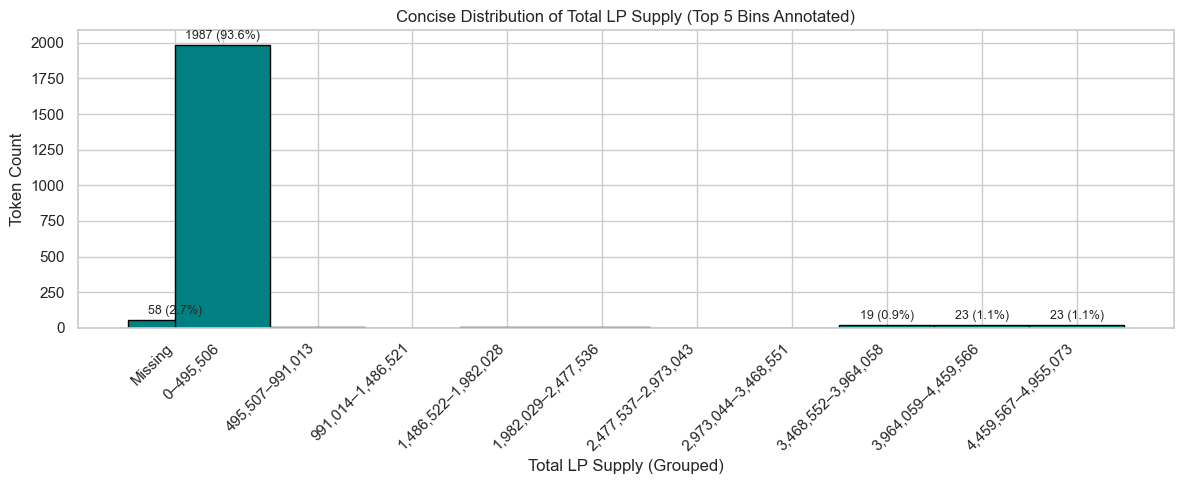

In [39]:
# Clean the data
df['total_lp_supply_cleaned'] = pd.to_numeric(df['total_lp_supply'], errors='coerce')
supply_data = df['total_lp_supply_cleaned'].dropna()
missing_count = df['total_lp_supply_cleaned'].isna().sum()

# Cap extreme values at the 99th percentile
cap_value = supply_data.quantile(0.99)
supply_data_clipped = supply_data.clip(upper=cap_value)

# Fewer bins for clarity
bin_edges = np.linspace(0, cap_value, 11)  # 10 bins
counts, edges = np.histogram(supply_data_clipped, bins=bin_edges)
bin_centers = 0.5 * (edges[:-1] + edges[1:])
total = counts.sum() + missing_count

# Add missing values as its own bin
bin_centers = np.insert(bin_centers, 0, -1)
counts = np.insert(counts, 0, missing_count)
labels = ['Missing'] + [f"{int(edges[i]):,}–{int(edges[i+1]-1):,}" for i in range(len(edges)-1)]

# Identify top 5 bins
top_5_indices = np.argsort(counts)[-5:]

# Plot
plt.figure(figsize=(12, 5))
bars = plt.bar(bin_centers, counts, width=(edges[1] - edges[0]), color='teal', edgecolor='black')

# Annotate top 5 bins
for i, bar in enumerate(bars):
    if i in top_5_indices and counts[i] > 0:
        percentage = (counts[i] / total) * 100
        plt.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() + total * 0.01,
                 f'{counts[i]} ({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=9)

# X-axis formatting
plt.xticks(ticks=bin_centers, labels=labels, rotation=45, ha='right')

# Titles and labels
plt.title("Concise Distribution of Total LP Supply (Top 5 Bins Annotated)")
plt.xlabel("Total LP Supply (Grouped)")
plt.ylabel("Token Count")
plt.tight_layout()
plt.show()

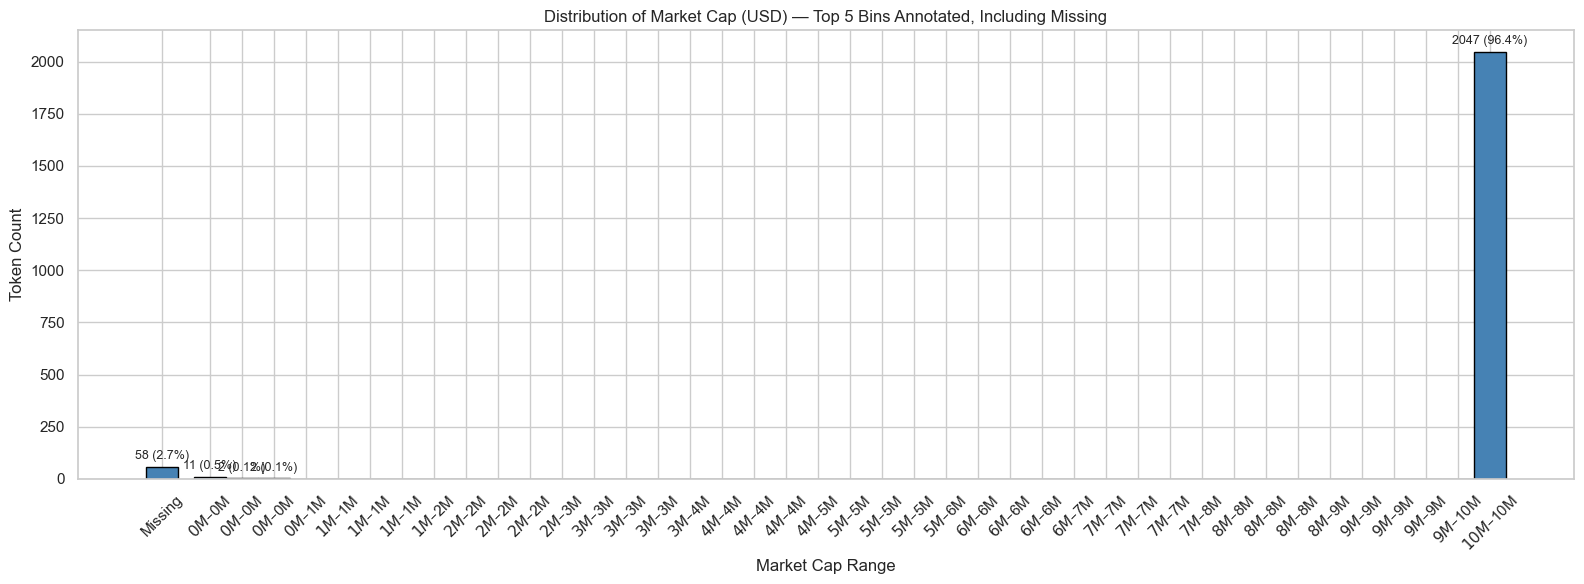

In [36]:
# Clean and prepare the data
df['market_cap_usd_cleaned'] = pd.to_numeric(df['market_cap_usd'], errors='coerce')
market_cap_data = df['market_cap_usd_cleaned'].dropna()
missing_count = df['market_cap_usd_cleaned'].isna().sum()

# Optional: clip extremely high values for readability (e.g., cap at $10M)
market_cap_data_clipped = market_cap_data.clip(upper=1e7)

# Create bins (e.g., $0 to $10M in $250k increments)
bin_edges = np.arange(0, 1.05e7, 2.5e5)
counts, edges = np.histogram(market_cap_data_clipped, bins=bin_edges)
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# Add missing values as its own bin
bin_centers = np.insert(bin_centers, 0, -2.5e5)  # Use negative x for "Missing"
counts = np.insert(counts, 0, missing_count)
labels = ['Missing'] + [f"${int(edges[i]/1e6):,}M–${int(edges[i+1]/1e6):,}M" for i in range(len(edges)-1)]
total = counts.sum()

# Identify top 5 bins by count
top_5_indices = np.argsort(counts)[-5:]

# Plot
plt.figure(figsize=(16, 6))
bars = plt.bar(bin_centers, counts, width=2.5e5, color='steelblue', edgecolor='black')

# Annotate only top 5 bins
for i, bar in enumerate(bars):
    if i in top_5_indices and counts[i] > 0:
        percentage = (counts[i] / total) * 100
        plt.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() + total * 0.01,
                 f'{counts[i]} ({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=9)

# Set custom x-axis ticks and labels
xticks = bin_centers
xlabels = labels
plt.xticks(ticks=xticks, labels=xlabels, rotation=45)

# Labels and title
plt.title("Distribution of Market Cap (USD) — Top 5 Bins Annotated, Including Missing")
plt.xlabel("Market Cap Range")
plt.ylabel("Token Count")
plt.tight_layout()
plt.show()

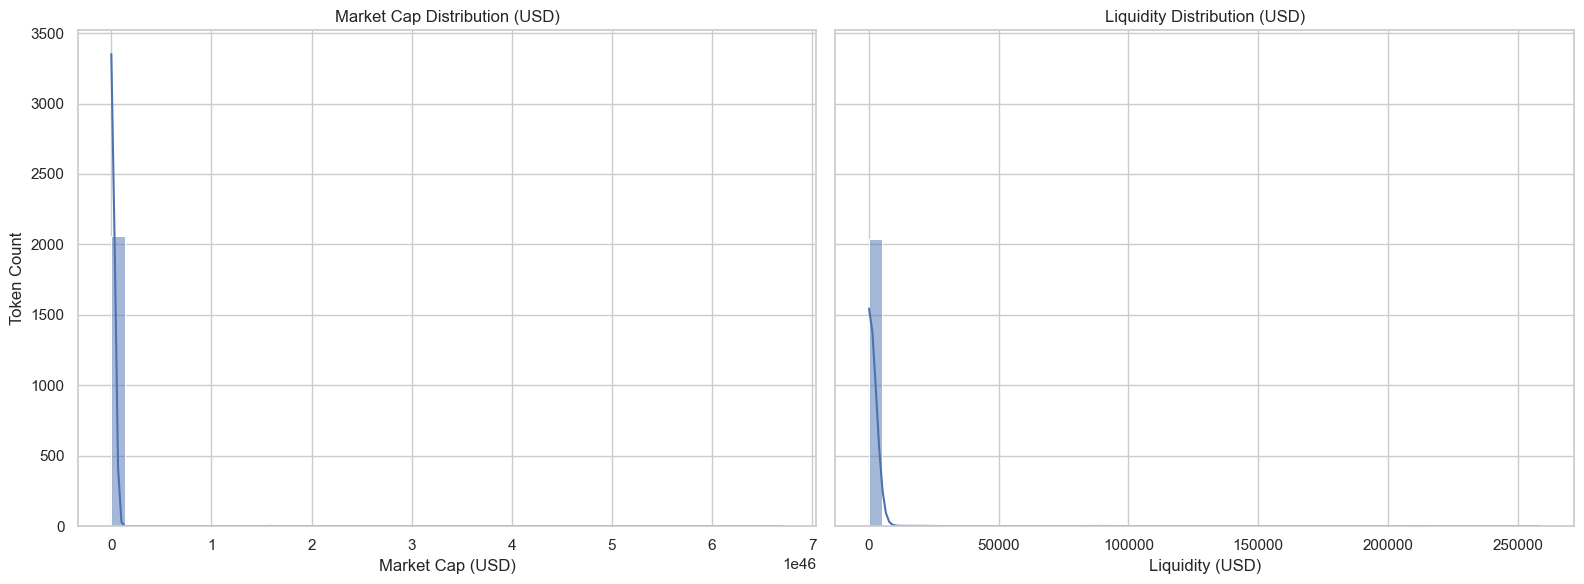

In [17]:
# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Market Cap plot
sns.histplot(ax=axes[0], x=df['market_cap_usd'], bins=50, kde=True)
axes[0].set_title('Market Cap Distribution (USD)')
axes[0].set_xlabel('Market Cap (USD)')
axes[0].set_ylabel('Token Count')

# Liquidity plot
sns.histplot(ax=axes[1], x=df['liquidity_usd'], bins=50, kde=True)
axes[1].set_title('Liquidity Distribution (USD)')
axes[1].set_xlabel('Liquidity (USD)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

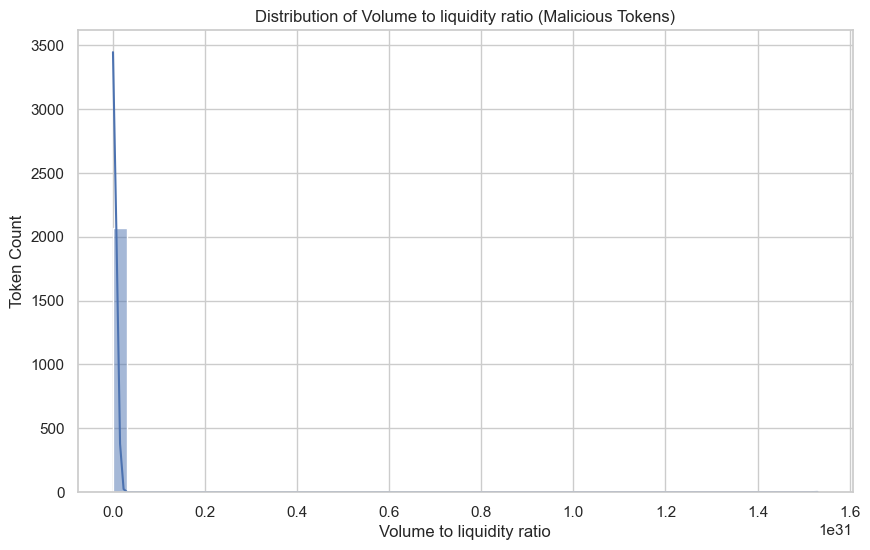

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['volume_to_liquidity_ratio'], bins=50, kde=True)
plt.title('Distribution of Volume to liquidity ratio (Malicious Tokens)')
plt.xlabel('Volume to liquidity ratio')
plt.ylabel('Token Count')
plt.show()



In [ ]:
df['locked_95_for_15_days']

0       False
1       False
2       False
3       False
4       False
        ...  
2118    False
2119    False
2120    False
2121    False
2122    False
Name: locked_95_for_15_days, Length: 2123, dtype: object

C:\Users\Famiglia\AppData\Local\Temp\ipykernel_4516\588935138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locked_counts.index.astype(str), y=locked_counts.values, palette='pastel')


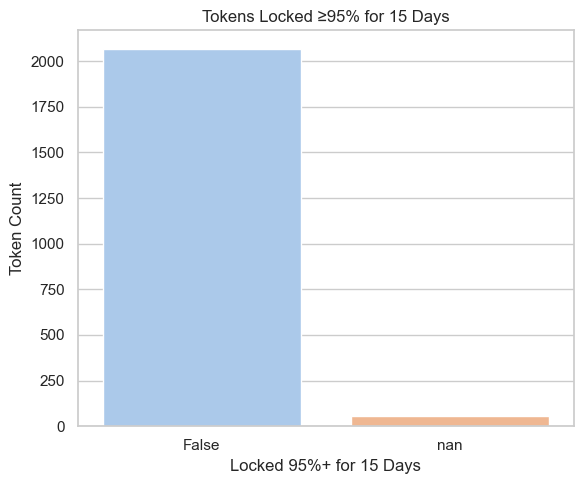

In [19]:
# Clean the column: Convert string to boolean
df['locked_95_for_15_days_cleaned'] = df['locked_95_for_15_days'].astype(str).str.strip().str.lower().map({
    'true': True,
    'false': False
})

# Count the values
locked_counts = df['locked_95_for_15_days_cleaned'].value_counts(dropna=False)

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x=locked_counts.index.astype(str), y=locked_counts.values, palette='pastel')
plt.title('Tokens Locked ≥95% for 15 Days')
plt.xlabel('Locked 95%+ for 15 Days')
plt.ylabel('Token Count')
plt.tight_layout()
plt.show()

C:\Users\Famiglia\AppData\Local\Temp\ipykernel_4516\3817111055.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locked_counts.index.astype(str), y=locked_counts.values, palette='pastel')


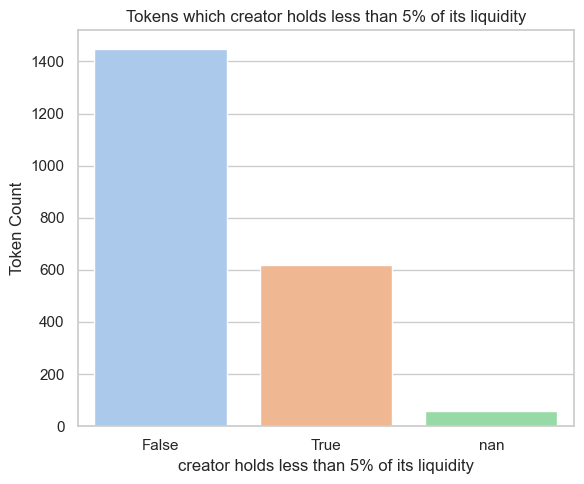

In [20]:
# Clean the column: Convert string to boolean
df['creator_under_5_percent_cleaned'] = df['creator_under_5_percent'].astype(str).str.strip().str.lower().map({
    'true': True,
    'false': False
})

# Count the values
locked_counts = df['creator_under_5_percent_cleaned'].value_counts(dropna=False)

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x=locked_counts.index.astype(str), y=locked_counts.values, palette='pastel')
plt.title('Tokens which creator holds less than 5% of its liquidity')
plt.xlabel('creator holds less than 5% of its liquidity')
plt.ylabel('Token Count')
plt.tight_layout()
plt.show()

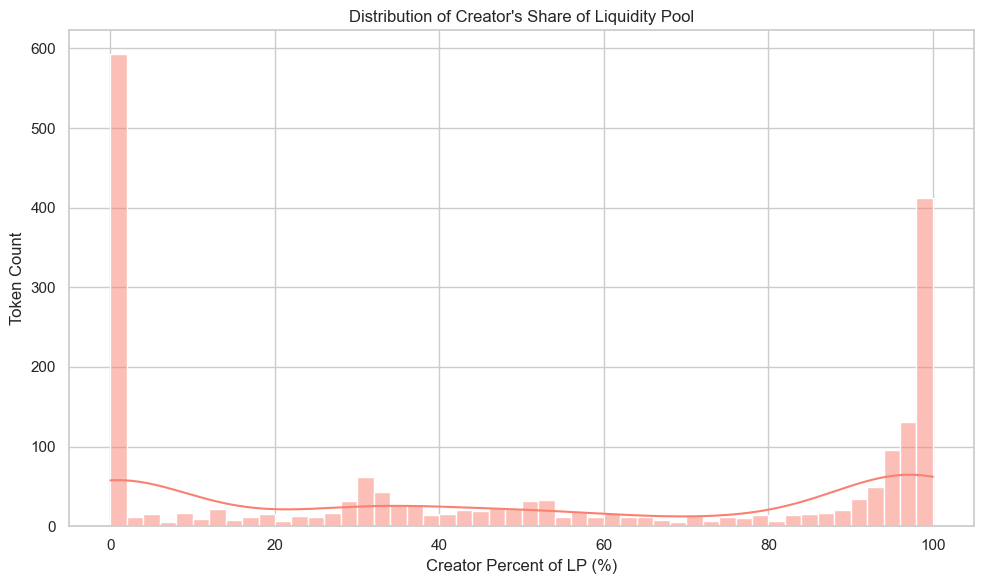

In [21]:
# Optional: Clip values to 0–100% to avoid invalid extremes
df['creator_percent_of_lp_clipped'] = pd.to_numeric(df['creator_percent_of_lp'], errors='coerce').clip(0, 100)

plt.figure(figsize=(10, 6))
sns.histplot(df['creator_percent_of_lp_clipped'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Creator\'s Share of Liquidity Pool')
plt.xlabel('Creator Percent of LP (%)')
plt.ylabel('Token Count')
plt.tight_layout()
plt.show()

C:\Users\Famiglia\AppData\Local\Temp\ipykernel_4516\3141197054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locked_counts.index.astype(str), y=locked_counts.values, palette='pastel')


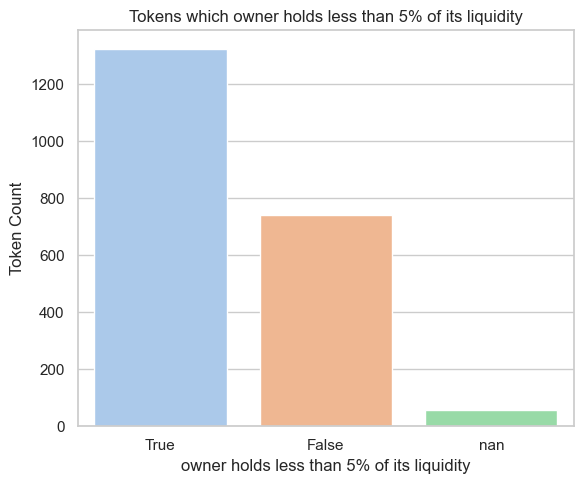

In [22]:

# Clean the column: Convert string to boolean
df['owner_under_5_percent_cleaned'] = df['owner_under_5_percent'].astype(str).str.strip().str.lower().map({
    'true': True,
    'false': False
})

# Count the values
locked_counts = df['owner_under_5_percent_cleaned'].value_counts(dropna=False)

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x=locked_counts.index.astype(str), y=locked_counts.values, palette='pastel')
plt.title('Tokens which owner holds less than 5% of its liquidity')
plt.xlabel('owner holds less than 5% of its liquidity')
plt.ylabel('Token Count')
plt.tight_layout()
plt.show()

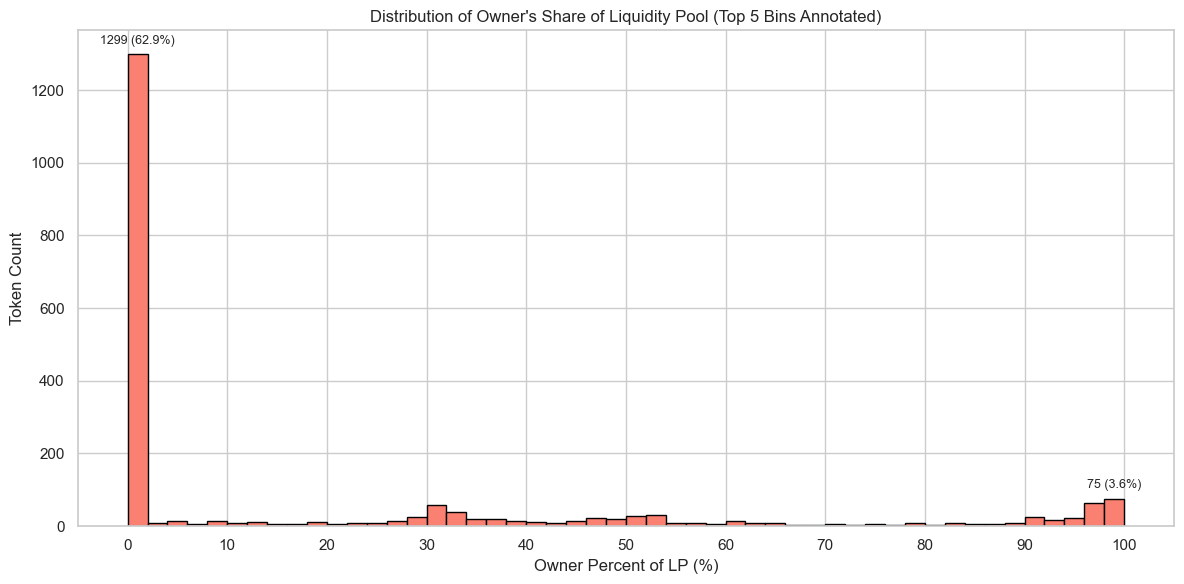

In [29]:
# Ensure data is numeric and clipped to [0, 100]
df['owner_percent_of_lp_clipped'] = pd.to_numeric(df['owner_percent_of_lp'], errors='coerce').clip(0, 100)

# Generate histogram data
owner_data = df['owner_percent_of_lp_clipped'].dropna()
bin_edges = np.linspace(0, 100, 51)  # 50 bins from 0 to 100
counts, edges = np.histogram(owner_data, bins=bin_edges)
bin_centers = 0.5 * (edges[:-1] + edges[1:])
total = counts.sum()

# Identify top 5 bins by count
top_5_indices = np.argsort(counts)[-2:]

# Plot the histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(bin_centers, counts, width=2, color='salmon', edgecolor='black')

# Annotate only the top 5 bars
for i, bar in enumerate(bars):
    if i in top_5_indices and counts[i] > 0:
        percentage = (counts[i] / total) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total * 0.01,
                 f'{counts[i]} ({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title("Distribution of Owner's Share of Liquidity Pool (Top 5 Bins Annotated)")
plt.xlabel("Owner Percent of LP (%)")
plt.ylabel("Token Count")
plt.xticks(np.arange(0, 110, 10))
plt.tight_layout()
plt.show()

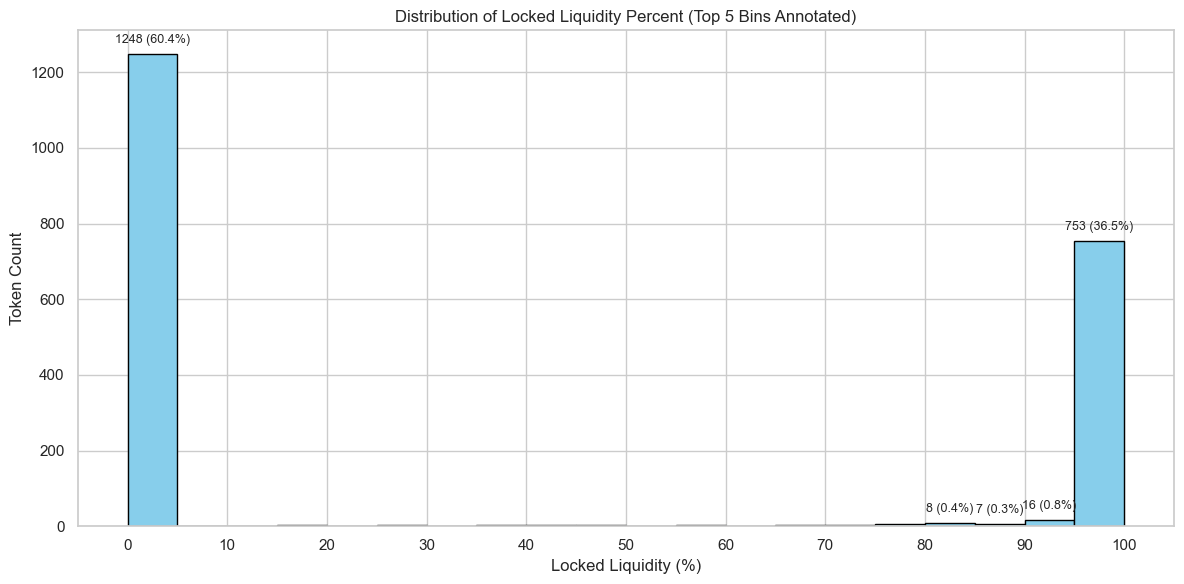

In [27]:
# Clean the data
locked_liquidity = pd.to_numeric(df['locked_liquidity_percent'], errors='coerce').clip(0, 100)
df['locked_liquidity_percent_cleaned'] = locked_liquidity

# Create histogram data
bin_edges = np.linspace(0, 100, 21)  # 20 bins (5% width)
counts, edges = np.histogram(locked_liquidity.dropna(), bins=bin_edges)
bin_centers = 0.5 * (edges[1:] + edges[:-1])
total = counts.sum()

# Identify indices of top 5 bins
top_5_indices = np.argsort(counts)[-5:]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(bin_centers, counts, width=5, align='center', color='skyblue', edgecolor='black')

# Annotate only top 5 bars
for i, bar in enumerate(bars):
    if i in top_5_indices and counts[i] > 0:
        percentage = (counts[i] / total) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total * 0.01,
                 f'{counts[i]} ({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=9)

# Labels and title
plt.title('Distribution of Locked Liquidity Percent (Top 5 Bins Annotated)')
plt.xlabel('Locked Liquidity (%)')
plt.ylabel('Token Count')
plt.xticks(np.arange(0, 110, 10))
plt.tight_layout()
plt.show()

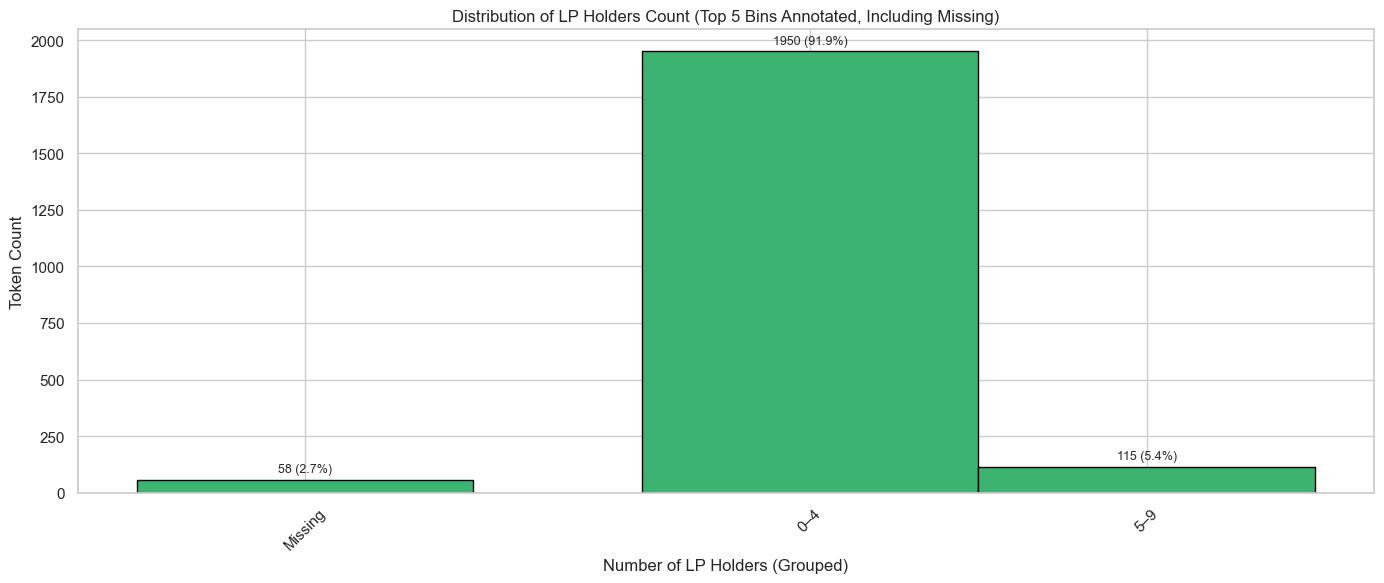

In [31]:
# Convert to numeric
df['lp_holders_count_cleaned'] = pd.to_numeric(df['lp_holders_count'], errors='coerce')

# Separate non-null and null values
lp_holders_data = df['lp_holders_count_cleaned'].dropna()
missing_count = df['lp_holders_count_cleaned'].isna().sum()

# Create histogram bins (bin width = 5, capped at 100 for readability)
max_val = lp_holders_data.max()
bin_edges = np.arange(0, min(max_val, 100) + 5, 5)
counts, edges = np.histogram(lp_holders_data, bins=bin_edges)
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# Add the missing values as an extra bin on the left
bin_centers = np.insert(bin_centers, 0, -5)  # use -5 as placeholder for "Missing"
counts = np.insert(counts, 0, missing_count)
labels = ['Missing'] + [f"{int(edges[i])}–{int(edges[i+1]-1)}" for i in range(len(edges)-1)]
total = counts.sum()

# Identify top 5 bins including missing
top_5_indices = np.argsort(counts)[-5:]

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(bin_centers, counts, width=5, color='mediumseagreen', edgecolor='black')

# Annotate only top 5 bins
for i, bar in enumerate(bars):
    if i in top_5_indices and counts[i] > 0:
        percentage = (counts[i] / total) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total * 0.01,
                 f'{counts[i]} ({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=9)

# Adjust x-axis
xtick_labels = labels
xtick_positions = bin_centers
plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45)

# Labels and title
plt.title("Distribution of LP Holders Count (Top 5 Bins Annotated, Including Missing)")
plt.xlabel("Number of LP Holders (Grouped)")
plt.ylabel("Token Count")
plt.tight_layout()
plt.show()

In [32]:
df['error']

0       Liquidity pool info could not be retrieved.
1       Liquidity pool info could not be retrieved.
2       Liquidity pool info could not be retrieved.
3       Liquidity pool info could not be retrieved.
4       Liquidity pool info could not be retrieved.
                           ...                     
2118    Liquidity pool info could not be retrieved.
2119    Liquidity pool info could not be retrieved.
2120    Liquidity pool info could not be retrieved.
2121    Liquidity pool info could not be retrieved.
2122    Liquidity pool info could not be retrieved.
Name: error, Length: 2123, dtype: object